In [109]:
%load_ext autoreload
%autoreload 2

from fault_tolerance.experiment import Experiment
from fault_tolerance.ntk.lecun_init import lecun_ntk_wb
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
data = np.random.randn(1, 1)

In [114]:
NWB = lecun_ntk_wb()

In [97]:
m = 1000
N = [1, m, 1]
W = [np.random.randn(m, 1), np.random.randn(1, m) / m ** 0.5]
B = [np.zeros(m), np.zeros(1)]
p = [0, 0.1, 0]

In [98]:
exp = Experiment(N=N, W=W, B=B, p_inference=p)

In [99]:
exp.model_crashing.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1000)              2000      
_________________________________________________________________
lambda_5 (Lambda)            (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [100]:
exp.model_crashing.layers[1](tf.convert_to_tensor(np.ones((1, 10))))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [101]:
errors = exp.compute_error(data, repetitions=1000).flatten()

(array([  2.,  16.,  61., 122., 221., 258., 185.,  93.,  33.,   9.]),
 array([-0.73000133, -0.600876  , -0.47175068, -0.34262535, -0.21350002,
        -0.0843747 ,  0.04475063,  0.17387596,  0.30300128,  0.4321266 ,
         0.56125194], dtype=float32),
 <BarContainer object of 10 artists>)

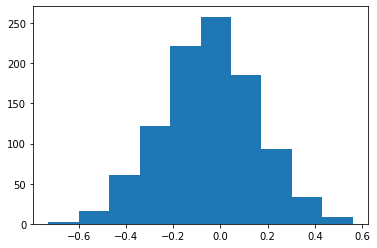

In [102]:
plt.hist(errors)

In [103]:
np.mean(errors), np.std(errors)

(-0.04729792, 0.20218861)

In [44]:
exp.predict_correct(data)

array([[-0.9787519]], dtype=float32)

In [48]:
exp.predict_crashing(data, repetitions=2)

array([[[-0.489376],
        [-0.489376]]], dtype=float32)

In [105]:
exp.run(data)

NameError: name 'get_session' is not defined